In [1]:
import numpy as np
import pylab as plt
import swyft
from swyft import utils
import torch
%load_ext autoreload
%autoreload 2
swyft.set_verbosity(5)

In [2]:
DEVICE = 'cuda:0'

In [3]:
def model(params, sigma = .1):
    z = np.array(list(params.values()))
    x = np.abs(z-0.5)*2  # 0 ... 1
    return dict(x=x)

In [4]:
def noise(obs, params, sigma = 0.1):
    x = obs['x']
    x = x + np.random.randn(*x.shape) * sigma
    return dict(x=x)

In [5]:
zdim=2
params = ["z"+str(i) for i in range(zdim)]
par0 = {k: 0.25 for k in params}
obs0 = noise(model(par0), par0)
obs1=model(par0)  # Asimov data

In [6]:
prior = swyft.Prior({k: ["uniform", 0., 1.] for k in params})

In [7]:
s = swyft.NestedRatios(model, prior, noise = noise, obs = obs0, device = DEVICE, Ninit = 1000, Nmax=20000)

In [8]:
s.run(max_rounds=1, train_args = dict(lr_schedule = [1e-3, 1e-4]))

Simulate:   8%|▊         | 75/990 [00:00<00:01, 748.99it/s]

Creating new cache.
  adding 990 new samples to simulator cache.


Simulate: 100%|██████████| 990/990 [00:01<00:00, 922.28it/s]


In [9]:
samples = s.marginals(obs1, 10000)

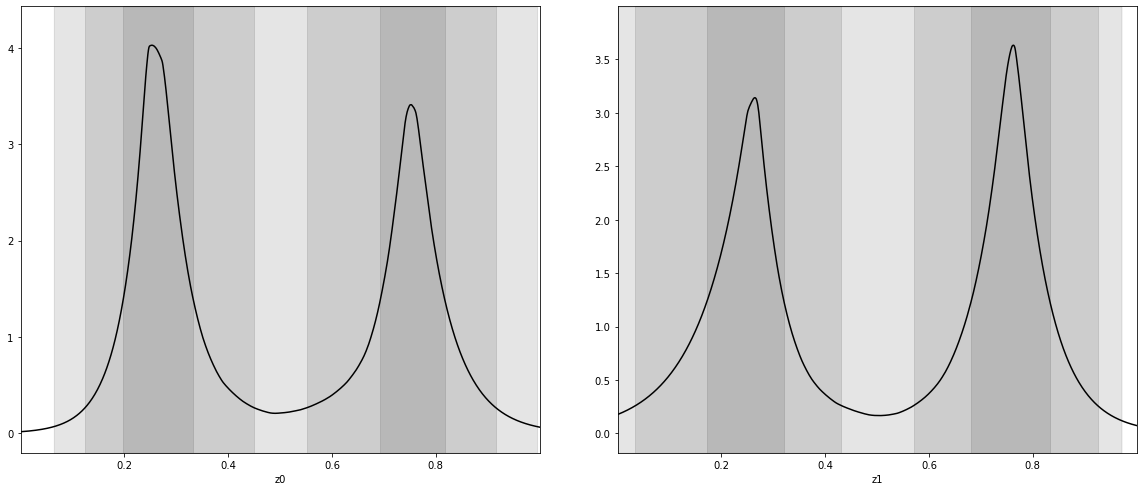

In [10]:
swyft.plot.plot1d(samples, params, figsize = (20, 8), ncol = 2, grid_interpolate = True)

In [11]:
indices = s.cache.sample(s._history[-1]['constr_prior'], 1)
points = swyft.Points(indices, s._cache, s._noise)

In [12]:
utils.estimate_coverage(s.marginals, points, nrounds = 100)

UnboundLocalError: local variable 'diag' referenced before assignment